# Introduction Mask R-CNN - Prediction

Useful links

* https://github.com/leekunhee/Mask_RCNN
* https://github.com/ahmedfgad/Mask-RCNN-TF2
* https://bitbucket.org/rewintous/isic_2018_mrcnn_submit/src/master/


pigment_network = /content/drive/MyDrive/skin_cancer/models/mask_rcnn/weights/lesion20230922T1112/

## Connecting to the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setting up google collaboration

In [2]:
#configurando o ambiente
!pip install -r "/content/drive/MyDrive/skin_cancer/models/mask_rcnn/requirements.txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.1/298.1 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Importing libraries

In [3]:
# import packages
import os
import sys
import numpy as np
import tensorflow as tf
import skimage.io
import argparse
import imutils
import random
import cv2
import warnings
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline

from imutils import paths

#Root directory of the project
ROOT_DIR = os.path.abspath("/content/drive/MyDrive/skin_cancer/models/mask_rcnn")
sys.path.append(ROOT_DIR)  #To find local version of the library

from imgaug import augmenters as iaa
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
from mrcnn import utils

warnings.filterwarnings('ignore')

## Configurations

In [4]:
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.11.0

Num GPUs Available:  0


### Environment variables

In [5]:
TASK = 1

if TASK == 1:
  os.environ["DATASET_PATH"] = "/content/drive/MyDrive/skin_cancer/assets/img_dataset/"
  os.environ["TASK"] = "task_1_lesion_segmentation"
  os.environ["NUMBER_OF_CLASSES"] = "1"

  os.environ["TRAINING_MASKS_PATH"] = str(os.environ["DATASET_PATH"] + "ISIC2018_Task1_Training_GroundTruth")
  os.environ["VALIDATION_MASKS_PATH"] = str(os.environ["DATASET_PATH"] + "ISIC2018_Task1_Validation_GroundTruth")
  os.environ["TEST_MASKS_PATH"] = str(os.environ["DATASET_PATH"] +  "ISIC2018_Task1_Test_GroundTruth")
elif TASK == 2:
  os.environ["DATASET_PATH"] = "/content/drive/MyDrive/skin_cancer/assets/data_aug_dataset_complete/"
  os.environ["TASK"] = "task_2_lesion_attribute_detection"
  os.environ["NUMBER_OF_CLASSES"] = "5"

  os.environ["TRAINING_MASKS_PATH"] = str(os.environ["DATASET_PATH"] + "ISIC2018_Task2_Training_GroundTruth_v3")
  os.environ["VALIDATION_MASKS_PATH"] = str(os.environ["DATASET_PATH"] + "ISIC2018_Task2_Validation_GroundTruth")
  os.environ["TEST_MASKS_PATH"] = str(os.environ["DATASET_PATH"] + "ISIC2018_Task2_Test_GroundTruth")

if TASK in [1, 2]:
  os.environ["TRAINING_IMAGES_PATH"] = str(os.environ["DATASET_PATH"] + "ISIC2018_Task1-2_Training_Input")
  os.environ["VALIDATION_IMAGES_PATH"] = str(os.environ["DATASET_PATH"] + "ISIC2018_Task1-2_Validation_Input")
  # os.environ["TEST_IMAGES_PATH"] = str(os.environ["DATASET_PATH"] + "ISIC2018_Task1_and_2_Test_Input")
  os.environ["TEST_IMAGES_PATH"] = str("/content/drive/MyDrive/skin_cancer/assets/img_dataset/" + "ISIC2018_Task1_and_2_Test_Input")

  os.environ["VALIDATION_COUNT"] = "100"
  os.environ["TRAINING_COUNT"] = "2594"
  os.environ["TEST_COUNT"] = "1000"

  # os.environ["VALIDATION_COUNT"] = "72"
  # os.environ["TRAINING_COUNT"] = "2199"
  # os.environ["TEST_COUNT"] = "1000"

### Global variables

In [6]:
#initialize the path to the Mask R-CNN pre-trained on COCO
COCO_PATH = "/content/drive/MyDrive/skin_cancer/models/mask_rcnn/weights/mask_rcnn_coco.h5" # "/content/drive/MyDrive/skin_cancer/models/mask_rcnn/weights/lesion20230313T2032/mask_rcnn_lesion_0030.h5"

#initialize the name of the directory where logs and output model snapshots will be stored
LOGS_AND_MODEL_DIR = "/content/drive/MyDrive/skin_cancer/models/mask_rcnn/weights"

print(f"Quantidade de imagens de treino: {int(os.environ['TRAINING_COUNT'])} ({100 * int(os.environ['TRAINING_COUNT'])/(int(os.environ['TRAINING_COUNT']) + int(os.environ['VALIDATION_COUNT']))} %)")
print(f"Quantidade de imagens de validacao: {int(os.environ['VALIDATION_COUNT'])} ({100 * int(os.environ['VALIDATION_COUNT'])/(int(os.environ['TRAINING_COUNT']) + int(os.environ['VALIDATION_COUNT']))} %)")

Quantidade de imagens de treino: 2594 (96.28804751299184 %)
Quantidade de imagens de validacao: 100 (3.7119524870081664 %)


# Model

## Model config

In [7]:
class LesionConfig(Config):
	"""Configuration for training on the nucleus segmentation dataset."""

	#give the configuration a recognizable name
	NAME = "lesion"

	# set the number of GPUs to use training along with the number of
	# images per GPU (which may have to be tuned depending on how much memory your GPU has)
	GPU_COUNT = 1
	IMAGES_PER_GPU = 4

	# number of classes (+ 1 for the background)
	NUM_CLASSES = int(os.environ["NUMBER_OF_CLASSES"]) + 1

	# set the number of steps per training epoch and validation cycle
	STEPS_PER_EPOCH = (int(os.environ["TRAINING_COUNT"]) - int(os.environ["VALIDATION_COUNT"])) // IMAGES_PER_GPU
	VALIDATION_STEPS = max(1, int(os.environ["VALIDATION_COUNT"]) // IMAGES_PER_GPU)

	# Don't exclude based on confidence. Since we have two classes
  # then 0.5 is the minimum anyway as it picks between nucleus and BG
	DETECTION_MIN_CONFIDENCE = 0

	# Backbone network architecture
	# Supported values are: resnet50, resnet101
	BACKBONE = "resnet50"

	# Input image resizing
	# Random crops of size 512x512 vs SQUARE 768 vs pad64 todo
	IMAGE_RESIZE_MODE = "square"
	IMAGE_MIN_DIM = 256
	IMAGE_MAX_DIM = 256

	# Length of square anchor side in pixels
	RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)

	# ROIs kept after non-maximum supression (training and inference)
	POST_NMS_ROIS_TRAINING = 1000
	POST_NMS_ROIS_INFERENCE = 2000

	# Non-max suppression threshold to filter RPN proposals.
	# You can increase this during training to generate more propsals.
	RPN_NMS_THRESHOLD = 0.9

	# How many anchors per image to use for RPN training
	RPN_TRAIN_ANCHORS_PER_IMAGE = 64

	# Number of ROIs per image to feed to classifier/mask heads
	# The Mask RCNN paper uses 512 but often the RPN doesn't generate
	# enough positive proposals to fill this and keep a positive:negative
	# ratio of 1:3. You can increase the number of proposals by adjusting
	# the RPN NMS threshold.
	TRAIN_ROIS_PER_IMAGE = 128

	# Maximum number of ground truth instances to use in one image
	MAX_GT_INSTANCES = 200

	# # Max number of final detections per image
	DETECTION_MAX_INSTANCES = 400

	# my configs
	# LEARNING_RATE = 0.01

	# If enabled, resizes instance masks to a smaller size to reduce
	# memory load. Recommended when using high-resolution images.
	USE_MINI_MASK = False
	MINI_MASK_SHAPE = (56, 56)  # (height, width) of the mini-mask

class LesionInferenceConfig(LesionConfig):
	# Set batch size to 1 to run one image at a time
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1

	# Don't resize imager for inferencing
  # IMAGE_RESIZE_MODE = "pad64"

	# Non-max suppression threshold to filter RPN proposals.
	# You can increase this during training to generate more propsals.
	RPN_NMS_THRESHOLD = 0.7

	# #set the minimum detection confidence (used to prune out false positive detections)
	# DETECTION_MIN_CONFIDENCE = 0.9

#initialize the training configuration
config = LesionConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     4
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 4
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                

## Dataset

In [8]:
class LesionDataset(utils.Dataset):
	def __init__(self, subset, class_map=None):
		super().__init__(class_map)
		self.image_paths = None
		self.ground_truth_dir = None
		self.subset = subset

	def configure_dataset(self):
		# reducing the size of the dataset
		if self.subset == "train":
			self.image_paths = self.image_paths[:int(os.environ["TRAINING_COUNT"])]
		elif self.subset == "val":
			self.image_paths = self.image_paths[:int(os.environ["VALIDATION_COUNT"])]
		elif self.subset == "test":
			self.image_paths = self.image_paths[:int(os.environ["TEST_COUNT"])]

		print(f"len(self.image_paths) {len(self.image_paths)}")

	def setup_classes(self):
		if os.environ["NUMBER_OF_CLASSES"] == "1":
			self.add_class("skinroi", 1, "skinroi")
		else:
			self.add_class("skinroi", 1, "globules")
			self.add_class("skinroi", 2, "milia_like_cyst")
			self.add_class("skinroi", 3, "negative_network")
			self.add_class("skinroi", 4, "pigment_network")
			self.add_class("skinroi", 5, "streaks")
		#TROCAR AQUI
			# self.add_class("skinroi", 1, "pigment_network")

	def load_skin(self, dataset_dir, ground_truth_dir):
		self.ground_truth_dir = ground_truth_dir
		self.setup_classes() # Add classes

		self.image_paths = sorted(list(paths.list_images(dataset_dir)))
		self.configure_dataset()

		# Add images
		for image_path in self.image_paths:
				split_names = os.path.split(str(image_path))
				fn, ext = os.path.splitext(split_names[-1])
				self.add_image("skinroi", image_id=fn, path=str(image_path))

	def load_mask(self, image_id):
		info = self.image_info[image_id]
		masks = []

		for class_id in range(1, self.num_classes):
				mask_path = os.path.join(str(self.ground_truth_dir), self.format_mask_name(class_id, info))
				# Read mask files from .png image
				masks.append(skimage.io.imread(mask_path).astype(np.bool))
		mask = np.stack(masks, axis=-1)

		# Return mask, and array of class IDs of each instance. Since we have
		# one class ID, we return an array of ones
		return mask, np.asarray(range(1,self.num_classes))

	def format_mask_name(self, class_id, info):
		if os.environ["NUMBER_OF_CLASSES"] == "1":
			return info['id'] + "_segmentation.png"
		else:
			return info['id'] + "_attribute_" + self.class_names[class_id] + ".png"

	def image_reference(self, image_id):
		"""Return the path of the image."""
		info = self.image_info[image_id]
		if info["source"] == "skinroi":
				return info["id"]
		else:
				super(self.__class__, self).image_reference(image_id)

In [9]:
#load the training dataset
dataset_train = LesionDataset("train")
dataset_train.load_skin(os.environ["TRAINING_IMAGES_PATH"], os.environ["TRAINING_MASKS_PATH"])
dataset_train.prepare()

#load the validation dataset
dataset_val = LesionDataset("val")
dataset_val.load_skin(os.environ["VALIDATION_IMAGES_PATH"], os.environ["VALIDATION_MASKS_PATH"])
dataset_val.prepare()

#load the test dataset
dataset_test = LesionDataset("test")
dataset_test.load_skin(os.environ["TEST_IMAGES_PATH"], os.environ["TEST_MASKS_PATH"])
dataset_test.prepare()

len(self.image_paths) 2594
len(self.image_paths) 100


TREINO



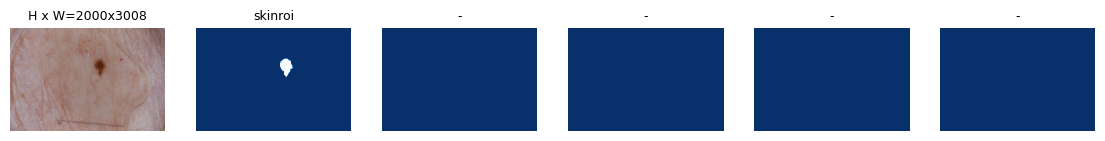


VALIDATION



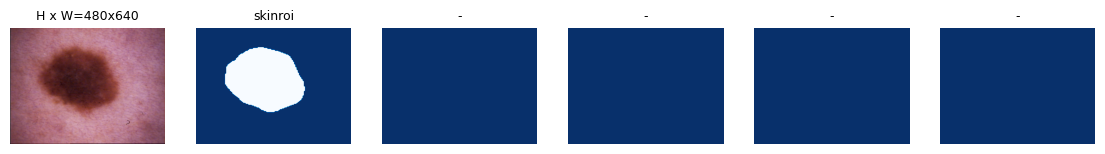

In [10]:
print("TREINO\n")

#determine a sample of training image indexes and loop over them
for i in np.random.choice(dataset_train.image_ids, 1):
  #load the image and masks for the sampled image
  # print(f"Investigating image index: {i}\n")

  image = dataset_train.load_image(i)
  (masks, class_ids) = dataset_train.load_mask(i)

  #visualize the masks for the current image
  visualize.display_top_masks(image, masks, class_ids, dataset_train.class_names, 5)

print("\nVALIDATION\n")

#determine a sample of training image indexes and loop over them
for i in np.random.choice(dataset_val.image_ids, 1):
  #load the image and masks for the sampled image
  # print(f"Investigating image index: {i}\n")

  image = dataset_val.load_image(i)
  (masks, class_ids) = dataset_val.load_mask(i)

  #visualize the masks for the current image
  visualize.display_top_masks(image, masks, class_ids, dataset_val.class_names, 5)

print("\nTEST\n")

#determine a sample of training image indexes and loop over them
for i in np.random.choice(dataset_test.image_ids, 1):
  #load the image and masks for the sampled image
  # print(f"Investigating image index: {i}\n")

  image = dataset_test.load_image(i)
  (masks, class_ids) = dataset_test.load_mask(i)

  #visualize the masks for the current image
  visualize.display_top_masks(image, masks, class_ids, dataset_test.class_names, 5)

# Evaluation

## Defining the metrics and ax_image



In [11]:
def accuracy_coef(y_true, y_pred):
  return np.sum(np.equal(y_true, y_pred)) / len(y_true)

# jaccard coefficient: https://en.wikipedia.org/wiki/Jaccard_index
def jaccard_coef(y_true, y_pred):
  intersec = y_true * y_pred
  union = np.logical_or(y_true, y_pred).astype(int)
  if intersec.sum() == 0:
      jac_coef = 0
  else:
      jac_coef = round(intersec.sum() / union.sum(), 2)
  return jac_coef

# dice coefficient: https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient
def dice_coef(y_true, y_pred):
  intersec = y_true * y_pred
  union = y_true + y_pred
  if intersec.sum() == 0:
      dice_coef = 0
  else:
      dice_coef = round(intersec.sum() * 2 / union.sum(), 2)
  return dice_coef


from sklearn.metrics import recall_score

def specificity(y_true, y_pred):
  return recall_score(y_true, y_pred, pos_label=0, average='micro')

def get_ax(rows=1, cols=1, size=12):
  """Return a Matplotlib Axes array to be used in
  all visualizations in the notebook. Provide a
  central point to control graph sizes.

  Change the default size attribute to control the size
  of rendered images
  """
  _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
  return ax

## Results

In [12]:
inference_config = LesionInferenceConfig()

#initialize the Mask R-CNN model for inference
model = modellib.MaskRCNN(mode="inference", config=inference_config, model_dir=LOGS_AND_MODEL_DIR)

#load our trained Mask R-CNN
weights = model.find_last()
# #TROCAR AQUI
# weights = "/content/drive/MyDrive/skin_cancer/models/mask_rcnn/weights/lesion20230922T1417/mask_rcnn_lesion_0009.h5"
lesion_folder = weights.rsplit('/', 1)[0]
print(f"lesion_folder {lesion_folder}")

#load trained weights
print("Loading weights from ", weights)
model.load_weights(weights, by_name=True)

# pigment network /content/drive/MyDrive/skin_cancer/models/mask_rcnn/weights/lesion20230922T1417/mask_rcnn_lesion_0009.h5
# globules /content/drive/MyDrive/skin_cancer/models/mask_rcnn/weights/lesion20230922T1545/mask_rcnn_lesion_0010.h5


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Instructions for updating:
Use fn_output_signature instead


lesion_folder /content/drive/MyDrive/skin_cancer/models/mask_rcnn/weights/lesion20231003T1608
Loading weights from  /content/drive/MyDrive/skin_cancer/models/mask_rcnn/weights/lesion20231003T1608/mask_rcnn_lesion_0015.h5
Re-starting from epoch 15


In [25]:
def coeff_per_image(metric_name, image_id, pred, gt_mask, gt_class_id):
  coeff_dict = {}

  for class_id in range(1, int(os.environ["NUMBER_OF_CLASSES"]) + 1):
    coeff_dict[class_id] = []
    gt_index = np.where(gt_class_id == class_id)

    # if there is no groundtruth or no predicted mask, the coefficient is equal to zero
    if gt_index[0].size == 0 or len(pred["masks"]) == 0:
      coeff_dict[class_id].append(0)
    else: # get the union of all groundtruth masks belong to class_id
      gt_mask_per_class = gt_mask[:, :, gt_index[0]] # get groundtruth mask
      _gt_sum = np.zeros((gt_mask.shape[0],gt_mask.shape[1]))

      for gt_num in range(gt_mask_per_class.shape[2]): # as there may be over one mask per class
        _gt =  gt_mask_per_class[:, :, gt_num]
        _gt_sum = _gt_sum + _gt

      _gt_union = (_gt_sum > 0).astype(int)

      # get the union of all predicted masks belong to class_id
      pred_index = np.where(pred["class_ids"] == class_id)
      pred_mask_per_class = pred["masks"][:, :, pred_index[0]]

      _mask_sum = np.zeros((pred["masks"].shape[0], pred["masks"].shape[1]))

      for num in range(pred_mask_per_class.shape[2]):
        _mask = pred_mask_per_class[:,:,num]
        _mask_sum = _mask_sum + _mask

      _mask_union = (_mask_sum > 0).astype(int)

      if metric_name == "accuracy":
        coeff_dict[class_id].append(accuracy_coef(_mask_union, _gt_union))
      elif metric_name == "jaccard index":
        coeff_dict[class_id].append(jaccard_coef(_mask_union, _gt_union))
      elif metric_name == "dice":
        coeff_dict[class_id].append(dice_coef(_mask_union, _gt_union))
      elif metric_name == "specificity":
        coeff_dict[class_id].append(specificity(_mask_union, _gt_union))

  return coeff_dict

def get_eval(model, base_dataset):
  accuracy_dic = {}
  accuracy_result = {}
  jaccard_dic = {}
  jaccard_result = {}
  dice_dic = {}
  dice_result = {}
  specificity_dic = {}
  specificity_result = {}

  for class_id in range(1, int(os.environ["NUMBER_OF_CLASSES"]) + 1):
    accuracy_result[class_id] = 0
    jaccard_result[class_id] = 0
    dice_result[class_id] = 0
    specificity_result[class_id] = 0

  # image_ids = np.random.choice(base_dataset.image_ids, 10) #base_dataset.image_ids[:10]
  # image_ids = base_dataset.image_ids
  image_ids = base_dataset.image_ids[:10]

  for image_id in image_ids:
    # load groundtruth and prediction per image
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(base_dataset, inference_config, image_id, use_mini_mask=False)
    results = model.detect([original_image], verbose=0)
    r = results[0]

    #Accuracy
    coeff_dict_accuracy = coeff_per_image("accuracy", image_id, r, gt_mask, gt_class_id)
    accuracy_dic[image_id] = coeff_dict_accuracy
    for key, value in coeff_dict_accuracy.items():
      accuracy_result[key] += float(value[0])

    #Jaccard
    coeff_dict_jaccard = coeff_per_image("jaccard index", image_id, r, gt_mask, gt_class_id)
    jaccard_dic[image_id] = coeff_dict_jaccard
    for key, value in coeff_dict_jaccard.items():
      jaccard_result[key] += float(value[0])

    #Dice
    coeff_dict_dice = coeff_per_image("dice", image_id, r, gt_mask, gt_class_id)
    dice_dic[image_id] = coeff_dict_dice
    for key, value in coeff_dict_dice.items():
      dice_result[key] += float(value[0])

    #Specificity
    coeff_dict_specificity = coeff_per_image("specificity", image_id, r, gt_mask, gt_class_id)
    specificity_dic[image_id] = coeff_dict_dice
    for key, value in coeff_dict_specificity.items():
      specificity_result[key] += float(value[0])

  for class_id in range(1, int(os.environ["NUMBER_OF_CLASSES"]) + 1):
    accuracy_result[class_id] = accuracy_result[class_id]/len(image_ids)
    jaccard_result[class_id] = jaccard_result[class_id]/len(image_ids)
    dice_result[class_id] = dice_result[class_id]/len(image_ids)
    specificity_result[class_id] = specificity_result[class_id]/len(image_ids)

  print(f"accuracy_dic {accuracy_dic}")
  print(f"jaccard_dic {jaccard_dic}")
  print(f"dice_dic {dice_dic}")

  return {"accuracy_result": accuracy_result, "jaccard_result": jaccard_result, "dice_result": dice_result}

eval_metrics = get_eval(model, dataset_val)

print(eval_metrics)

accuracy_dic {0: {1: [254.74609375]}, 1: {1: [248.984375]}, 2: {1: [248.6328125]}, 3: {1: [253.43359375]}, 4: {1: [243.8203125]}, 5: {1: [242.0703125]}, 6: {1: [203.49609375]}, 7: {1: [251.0859375]}, 8: {1: [254.79296875]}, 9: {1: [254.5390625]}}
jaccard_dic {0: {1: [0.68]}, 1: {1: [0.54]}, 2: {1: [0.62]}, 3: {1: [0.92]}, 4: {1: [0.75]}, 5: {1: [0.6]}, 6: {1: [0.68]}, 7: {1: [0.91]}, 8: {1: [0.97]}, 9: {1: [0.92]}}
dice_dic {0: {1: [0.81]}, 1: {1: [0.7]}, 2: {1: [0.76]}, 3: {1: [0.96]}, 4: {1: [0.86]}, 5: {1: [0.75]}, 6: {1: [0.81]}, 7: {1: [0.95]}, 8: {1: [0.99]}, 9: {1: [0.96]}}
{'accuracy_result': {1: 245.56015625}, 'jaccard_result': {1: 0.759}, 'dice_result': {1: 0.8550000000000001}}


## Visualize results

Investigating image index: 141



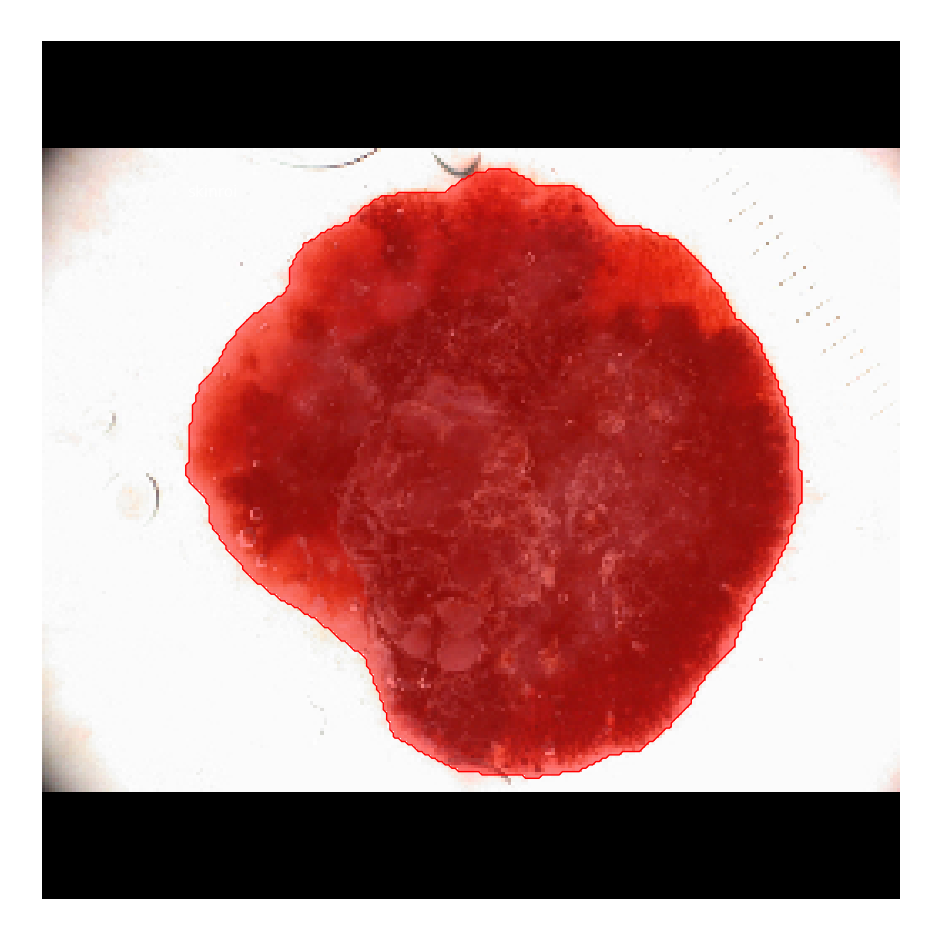

gt_class_id [1]
Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  256.00000  int64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32
r['class_ids'] [1]


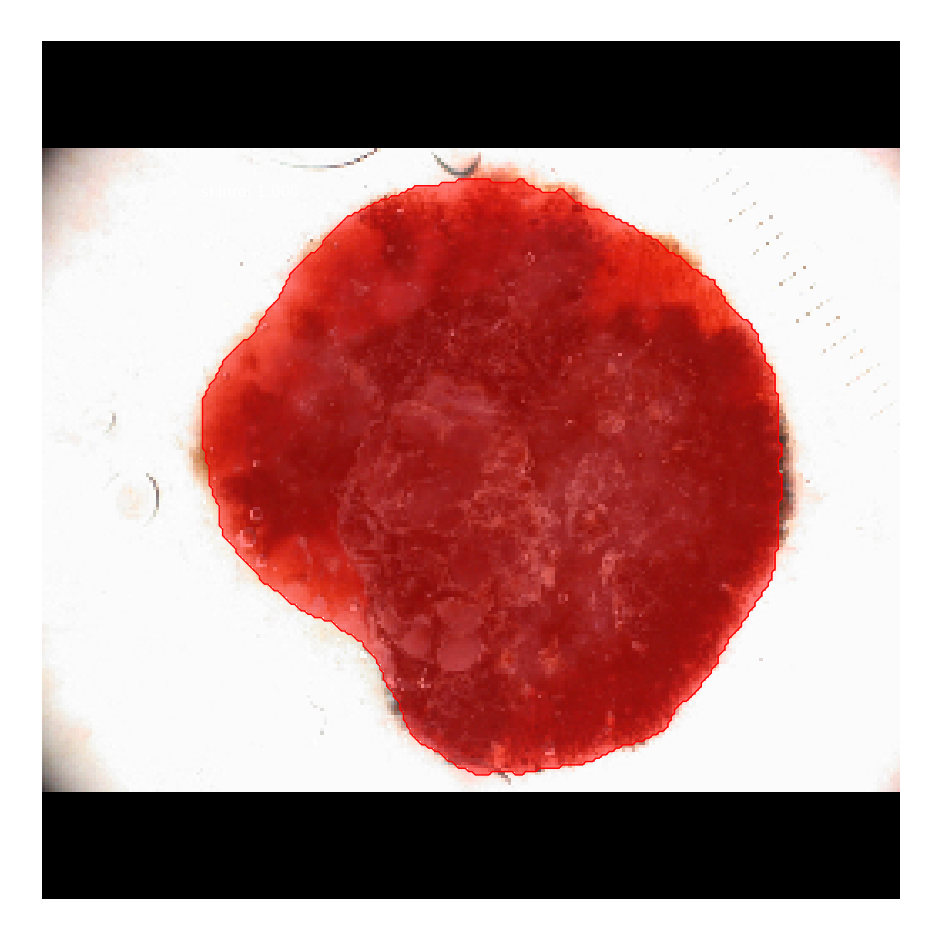

In [13]:
# Test on a random image
image_id = random.choice(dataset_train.image_ids)
# image_id = 127
print(f"Investigating image index: {image_id}\n")

original_image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_train, inference_config, image_id, use_mini_mask=False)
visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, dataset_train.class_names, figsize=(12, 12), show_bbox=False)

print(f"gt_class_id {gt_class_id}")

r = model.detect([original_image], verbose=1)[0]

print(f"r['class_ids'] {r['class_ids']}")
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], dataset_train.class_names, r['scores'], ax=get_ax(), show_bbox=False)

Investigating image index: 2129

gt_class_id [1]
Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  256.00000  int64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


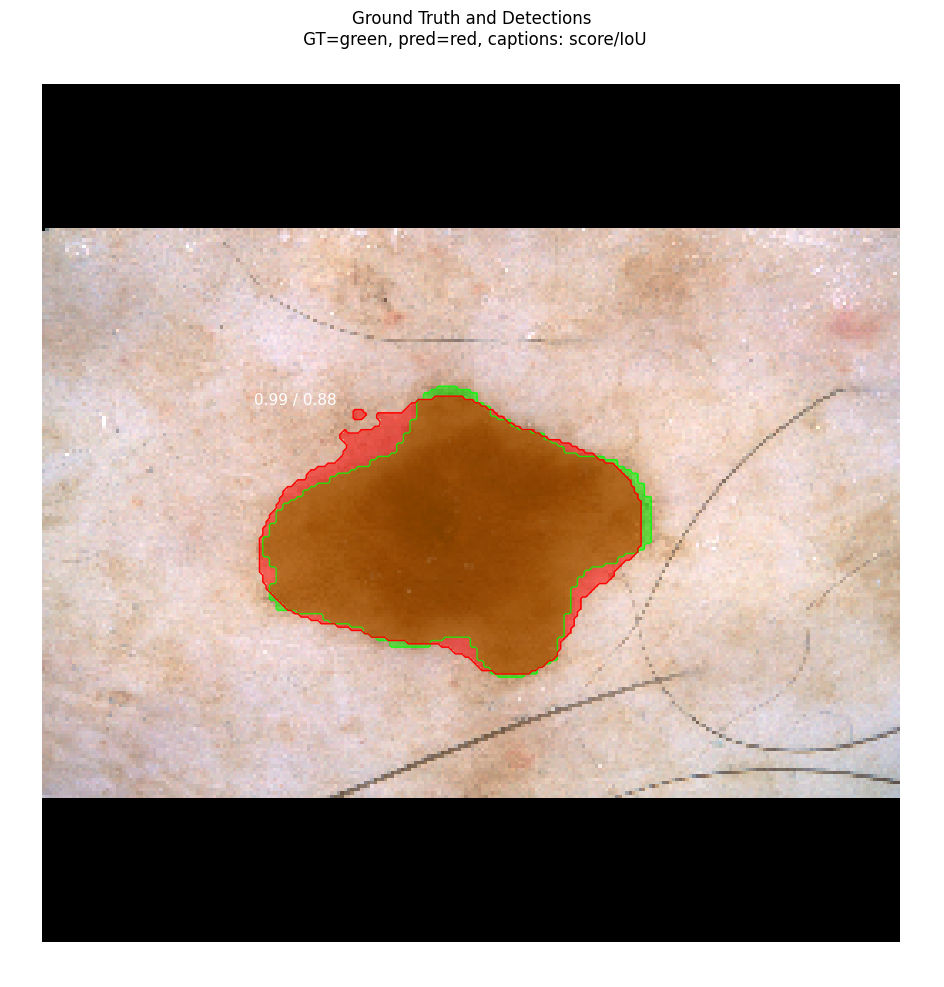

In [16]:
# Test on a random image
image_id = random.choice(dataset_train.image_ids)
# image_id = 16
print(f"Investigating image index: {image_id}\n")

original_image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_train, inference_config, image_id, use_mini_mask=False)

print(f"gt_class_id {gt_class_id}")

r = model.detect([original_image], verbose=1)[0]

visualize.display_differences(
  original_image,
  gt_bbox, gt_class_id, gt_mask,
  r['rois'], r['class_ids'], r['scores'], r['masks'],
  dataset_train.class_names, ax=get_ax(),
  show_box=False, show_mask=True,
  iou_threshold=0.5, score_threshold=0.5
)

# Extras

In [ ]:
# from tqdm import tqdm
# import math

# num_classes = 6
# image_ids = np.random.choice(dataset_train.image_ids, 10)
# total_iou = np.zeros((num_classes - 1)).astype(np.float32)

# for image_id in image_ids:
#   #Load image and ground truth data
#   image = dataset_train.load_image(image_id)
#   truth_masks, _ = dataset_train.load_mask(image_id)

#   #Run object detection
#   result = model.detect([image], verbose=0)[0]

#   bw_images = []
#   for class_id in range(1, num_classes):
#     bw_images.append(np.zeros(image.shape))

#   iou = np.zeros((num_classes - 1)).astype(np.float32)
#   for idx, val in enumerate(result['class_ids']):
#     visualize.apply_mask(bw_images[val - 1], result['masks'][:,:,idx], color=[1, 1, 1], alpha=1.0)
#     iou_this = utils.compute_overlaps_masks(result['masks'][:, :, idx:idx + 1], truth_masks[:, :, val - 1:val]).reshape(-1)[0]
#     # print(f"iou_this: {iou_this}")
#     # print(f"math.isnan(iou_this): {math.isnan(iou_this)}")

#     # use Jaccard instead of iou (i.e. if both masks are zero)
#     iou[val - 1] = 0 if math.isnan(iou_this) else iou_this

#     print(f"{image_id}: {iou.tolist()}")

#   total_iou = total_iou + iou
#   print(f"total_iou: {total_iou}")

# print(f"total_iou2: {total_iou}")

In [ ]:
# !lsof -i :6006

In [ ]:
# !kill -9 2340

In [ ]:
# # Load the TensorBoard notebook extension
# %reload_ext tensorboard

# %tensorboard --logdir /content/drive/MyDrive/skin_cancer/models/mask_rcnn/weights/lesion20230504T1637/

In [ ]:
# def dice_coef(y_true, y_pred):
#     intersec = y_true * y_pred
#     union = y_true + y_pred
#     if intersec.sum() == 0:
#         dice_coef = 0
#     else:
#         dice_coef = round(intersec.sum() * 2 / union.sum(), 2)
#     return dice_coef

In [ ]:
# image_id = random.choice(dataset_train.image_ids)
# print(f"Investigating image index: {image_id}\n")

# image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_train, inference_config, image_id)
# # Detect objects
# r = model.detect([image], verbose=0)[0]
# truth_masks, _ = dataset_train.load_mask(image_id)

# response = utils.compute_overlaps_masks(r['masks'], gt_mask)

# aux = utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])

# print(f"response {response}")
# print(f"AP, precisions, recalls, overlaps = {aux}")

# visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset_train.class_names, r['scores'], ax=get_ax())

In [ ]:
# total_iou = np.zeros((dataset_train.num_classes - 1)).astype(np.float32)

# print(f"total_iou {total_iou}")

# for image_id in dataset_train.image_ids:
#   # Load image and run detection
#   image = dataset_train.load_image(image_id)
#   # Detect objects
#   result = model.detect([image], verbose=0)[0]

#   source_id = dataset_train.image_info[image_id]["id"]
#   # Save image with masks [0].reshape(1,-1) to get the very first

#   regions_count = result['rois'].shape[0]
#   iou = np.zeros((dataset_train.num_classes - 1)).astype(np.float32)

#   if regions_count > 0:
#       result_mask = result['masks'][:, :, 0]

#       truth_masks, _ = dataset_train.load_mask(image_id)
#       iou = utils.compute_overlaps_masks(result['masks'], truth_masks).reshape(-1)
#       total_iou = total_iou + iou

#       print(f"iou {iou}")

#       print(f"total_iou {total_iou}")

In [ ]:
# from tqdm import tqdm

# #P @ IoU=0.5
# #Running on 10 images. Increase for better accuracy.
# #Metricas: Jaccard, precisão, Dice, especificidade, sensibilidade, acurácia (Métricas principais: Acurácia e Jaccard)

# image_ids = np.random.choice(dataset_train.image_ids, 10)
# ap_list = []
# precisions_list = []
# recalls_list = []
# overlaps_list = []
# dice_list = []

# for image_id in tqdm(image_ids):
#     #Load image and ground truth data
#     image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_train, inference_config, image_id)
#     molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)

#     #Run object detection
#     results = model.detect([image], verbose=0)
#     r = results[0]

#     #Compute AP
#     AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])

#     ap_list.append(AP)
#     precisions_list.append(precisions)
#     recalls_list.append(recalls)
#     overlaps_list.append(np.mean(overlaps))

# print("\n\nmAP: ", np.mean(ap_list))
# print("overlaps_mean: ", np.mean(overlaps_list))

In [ ]:
# #load the input image, convert it from BGR to RGB channel ordering, and resize the image
# image = cv2.imread("/content/drive/MyDrive/skin_cancer/assets/img_dataset/ISIC2018_Task1-2_Training_Input/ISIC_0000001.jpg")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# # image = cv2.resize(image, (512, 512))

# #perform a forward pass of the network to obtain the results
# r = model.detect([image], verbose=1)[0]

# #loop over of the detected object's bounding boxes and masks, drawing each as we go along
# for i in range(0, r["rois"].shape[0]):
#   mask = r["masks"][:, :, i]
#   image = visualize.apply_mask(image, mask, (1.0, 0.0, 0.0), alpha=0.5)
#   image = visualize.draw_box(image, r["rois"][i],	(1.0, 0.0, 0.0))

# #convert the image back to BGR so we can use OpenCV's drawing functions
# image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# #loop over the predicted scores and class labels
# for i in range(0, len(r["scores"])):
#   #extract the bounding box information, class ID, label and predicted probability from the results
#   (startY, startX, endY, end) = r["rois"][i]
#   classID = r["class_ids"][i]
#   label = CLASS_NAMES[classID]
#   score = r["scores"][i]

#   #draw the class label and score on the image
#   text = "{}: {:.4f}".format(label, score)
#   y = startY - 10 if startY - 10 > 10 else startY + 10
#   cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# #resize the image so it more easily fits on our screen
# # image = cv2.resize(image, (512, 512))

# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# #show the image with matplotlib
# plt.imshow(image)
# plt.show()

In [ ]:

	# def load_mask(self, image_id):
	# 	#grab the image info and derive the full annotation path file path
	# 	info = self.image_info[image_id]
	# 	filename = info["id"].split(".")[0]
	# 	annotPath = os.path.sep.join([DATASET_MASKS_PATH, f"{filename}_segmentation.png"])

	# 	#load the annotation mask and resize it, *making sure* to use nearest neighbor interpolation
	# 	annotMask = cv2.imread(annotPath)
	# 	annotMask = cv2.split(annotMask)[0]
	# 	# annotMask = imutils.resize(annotMask, width=self.width, inter=cv2.INTER_NEAREST)
	# 	# annotMask = cv2.resize(annotMask, (self.width, self.width))

	# 	annotMask[annotMask > 0] = 1

	# 	#determine the number of unique class labels in the mask
	# 	classIDs = np.unique(annotMask)
	# 	#the class ID with value '0' is actually the background which we should ignore and remove from the unique set of class identifiers
	# 	classIDs = np.delete(classIDs, [0])

	# 	#allocate memory for our [height, width, num_instances]
	# 	#array where each "instance" effectively has its own
	# 	#"channel" -- since there is only one lesion per image we
	# 	#know the number of instances is equal to 1
	# 	masks = np.zeros((annotMask.shape[0], annotMask.shape[1], 1),	dtype="uint8")

	# 	#loop over the class IDs
	# 	for (i, classID) in enumerate(classIDs):
	# 		#construct a mask for *only* the current label
	# 		classMask = np.zeros(annotMask.shape, dtype="uint8")
	# 		classMask[annotMask == classID] = 1

	# 		#store the class mask in the masks array
	# 		masks[:, :, i] = classMask

	# 	#return the mask array and class IDs
	# 	return (masks.astype("bool"), classIDs.astype("int32"))

In [ ]:
# import time
# import concurrent.futures

# def image_stats(image_id):
#     """Returns a dict of stats for one image."""
#     image = dataset_train.load_image(image_id)
#     mask, _ = dataset_train.load_mask(image_id)
#     bbox = utils.extract_bboxes(mask)
#     # Sanity check
#     assert mask.shape[:2] == image.shape[:2]
#     # Return stats dict
#     return {
#         "id": image_id,
#         "shape": list(image.shape),
#         "bbox": [[b[2] - b[0], b[3] - b[1]]
#                  for b in bbox
#                  # Uncomment to exclude nuclei with 1 pixel width
#                  # or height (often on edges)
#                  # if b[2] - b[0] > 1 and b[3] - b[1] > 1
#                 ],
#         "color": np.mean(image, axis=(0, 1)),
#     }

# # Loop through the dataset and compute stats over multiple threads
# # This might take a few minutes
# t_start = time.time()
# with concurrent.futures.ThreadPoolExecutor() as e:
#     stats = list(e.map(image_stats, dataset_train.image_ids))
# t_total = time.time() - t_start
# print("Total time: {:.1f} seconds".format(t_total))

In [ ]:
# # Image stats
# image_shape = np.array([s['shape'] for s in stats])
# image_color = np.array([s['color'] for s in stats])
# print("Image Count: ", image_shape.shape[0])
# print("Height  mean: {:.2f}  median: {:.2f}  min: {:.2f}  max: {:.2f}".format( np.mean(image_shape[:, 0]), np.median(image_shape[:, 0]), np.min(image_shape[:, 0]), np.max(image_shape[:, 0])))
# print("Width   mean: {:.2f}  median: {:.2f}  min: {:.2f}  max: {:.2f}".format(np.mean(image_shape[:, 1]), np.median(image_shape[:, 1]), np.min(image_shape[:, 1]), np.max(image_shape[:, 1])))
# print("Color   mean (RGB): {:.2f} {:.2f} {:.2f}".format(*np.mean(image_color, axis=0)))

# # Histograms
# fig, ax = plt.subplots(1, 3, figsize=(16, 4))
# ax[0].set_title("Height")
# _ = ax[0].hist(image_shape[:, 0], bins=20)
# ax[1].set_title("Width")
# _ = ax[1].hist(image_shape[:, 1], bins=20)
# ax[2].set_title("Height & Width")
# _ = ax[2].hist2d(image_shape[:, 1], image_shape[:, 0], bins=10, cmap="Blues")